## 1.1
### 2

O algoritmo que implementa o método de Newton é

In [2]:
# x: Valor inicial
# f: Função f(x)
# f_linha: Derivada da função f(x)
# n: Número de interações que serão feitas
function newton(x,f,f_linha,n)
    # Método de newton sendo aplicado. A cada iteração, temos uma aproximação melhor.
    # Itera de 1 até n
    for i in 1:n
        x = x - f(x)/f_linha(x)
    end
    # Retorna a aproximação desejada
    return x
end

newton (generic function with 1 method)

A função que nos interessa é $f(x) = \ln(3x)$ quando $x=1$. Tornando ambos os lados como o expoente da função $e$, temos
\begin{align*}
e^{f(1)} = 3
\end{align*}
pois x = 1. Isolando o 3
\begin{align*}
e^{f(1)} - 3 = 0
\end{align*}
Dessa forma, procuramos a raiz da função
\begin{align*}
g(y)=e^y-3 
\end{align*}
onde $y = f(1) = \ln(3)$. Utilizando o resultado acima, podemos utilizar o método de Newton para aproximar $\ln(3)$. Dessa forma, precisamos da primeira derivada, ou seja
$$
g'(y) = e^y
$$
e também do chute inicial. Para o chute inicial, sabemos que a raiz está entre $g(0)=-2$ e $g(2)\approx4.3890$, sendo assim, tomando a média desses dois resultados, podemos supor um chute inicial $y=1.1945$. O algoritmo será

In [ ]:
# Função f
g(y) = exp(y) - 3

# Derivada da função g
g_linha(y) = exp(y)

# Número de passos
n = 20

# Chute inical
y = 1.1945

# Imprime o resultado
print(newton(y,g,g_linha,n))

## 1.2

In [13]:
using LinearAlgebra

# pontos: São os pontos (x_i,f(x_i)) que serão utilizados na regressão
# grau: Grau do polinômio aproximador
function regressao(pontos, grau)
    # Número de equações geradas, ou linhas na matrix de Vandermonde
    n_eq =  length(pontos)
    # Número de colunas na matrix de Vandermonde
    n_col = grau + 1
    
    # Constroi a matriz de Vandermonde V e a matriz coluna y com os valores f(x_i)
    V = zeros(n_eq, n_col)
    y = zeros(n_eq)
    
    # Constroi a matriz de Vandermonde linha a linha. Assim como a matriz y.
    for i in 1:n_eq
        # Pontos é uma lista de tuplas [(i,f(i)),...,(j,f(j))]
        y[i] = pontos[i][2]
        for j in 1:n_col
            # Construção da matriz V elemento a elemento de uma linha
            V[i,j] = pontos[i][1]^(j-1)
        end
    end
    # Calcula os coeficientes do polinômio aproximador
    return V\y
end

regressao (generic function with 1 method)

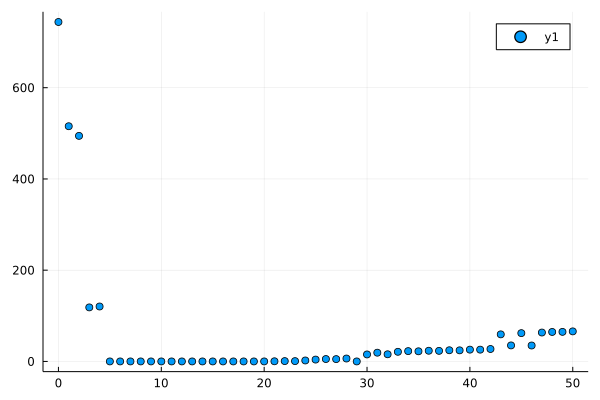

In [96]:
using Plots
using Distributions

# Polinômio de grau 5 
f(x) = x^(5)-x^(4)-x^(3)+x^(2)+x+1

# Pontos sendo gerados aleatoriamente. 
#= Primeiro geramos os valores do domínio i,...,j de forma aleatoria e uniforme, ou seja, evitando repetir valores.
Depois ordenamos estes valores em forma crescente para facilitar no momento do plot. 
A seguir, geramos uma lista com os pontos (i,f(i)),...,(j,f(j)), estes pontos são tuplas.
=#
xs = rand(Uniform(-5, 5), 30)
xs = sort(xs)
pontos = map((x) -> (x, f(x)), xs)

# Função que gera o polinômio aproximador e retorna o valor g(x) para um x dado
# coefs: Lista dos coeficientes computados
# x: Valor do contradomínio
function g(coefs, x)    
    y = 0
    # Computa y = c_0 + c_1x + c_2x^2 + ... + c_(n-1)x^(n-1)
    for i in 1:length(coefs)
        y = y + coefs[i]*x^(i-1)
    end
    return y
end

# Erros que serão calculados.
Y = []
# Número de pontos
n_pontos = length(pontos)
# Grau limite que será computado
grau_lim = 50

# Computa o erro para cada polinômio de grau i.
for i in 0:grau_lim
    # Supomos que o erro é 0 no início
    erro = 0
    # Computa os coeficientes do polinîmio aproximador
    coefs = regressao(pontos,i)
    # Soma todos os erros, para cada ponto dado. Assim temos uma "visão" de todos os erros.
    for j in 1:n_pontos
        # Para cada x_j na lista de pontos...
        x = pontos[j][1]
        # ... Somamos f(x_j) a soma dos demais erros calculados nos outros valores do domínio.
        erro = erro + abs(g(coefs,x) - f(x))
    end
    # Computamos a média desses erros, para evitar que o conjunto da imagem seja muito grande devido as somas.
    erro = erro / n_pontos
    
    # Colocamos o erro na lista dos erros calculados
    push!(Y,erro)
end

# Graus que serão calculados
X = 0:grau_lim
scatter(X,Y)

Podemos notar que quando o grau é menor que 5, o erro é grande, como é de se esperar, porque utlizamos um polinômio de grau 5 para gerar os pontos. Dessa forma, a partir do grau 5, a regressão acerta bem até certo ponto, visto que queremos acertar pontos gerados por um polinômio de grau 5 através de um polinômio com grau maior que 5.

Quando o polinômio tem um grau bem maior que 29, ou seja, um grau maior que polinômio interpolador para estes 30 pontos, o erro começa a aumentar novamente. Isso ocorre pois o sistema começa a ter bastante liberdade, já que há mais variáveis para serem determinadas do que equações para restringir do sistema. Sendo assim, um pensamento trivial seria "chutar" valores para essas novas variáveis a serem determinadas, pois teríamos infinitas soluções para o sistema. Como em muitas vezes um chute pode ser errado, o polinômio aproximador também pode errar quando há liberdade demais, ou em outras palavras, quando as variáveis a serem determinadas precisam seguir pouquíssimas equações para serem determinadas.